# 0.0 IMPORTS


In [57]:
import os
import pandas as pd
import inflection
import math
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import Image
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from scipy import stats as ss

## 0.1 Helper Functions

In [2]:
def cramer_v (x,y):

    cm = pd.crosstab(x, y).to_numpy()
    n=cm.sum()
    r,k=cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    v = np.sqrt((chi2corr/n)/(min(kcorr-1,rcorr-1)))
    
    return v

## 0.2 Diretorios

In [3]:
BASE_DIR = os.path.abspath('')   
DATA_DIR = os.path.join(BASE_DIR,'data')

## 0.3 Loading Data

In [4]:
df_sales_raw = pd.read_csv(os.path.join(DATA_DIR,'train.csv'), low_memory = False)
df_store_raw = pd.read_csv(os.path.join(DATA_DIR,'store.csv'), low_memory = False)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

df_raw_train, df_raw_tv = train_test_split(df_raw, random_state=43, train_size=0.8)

df_raw_tv = df_raw_tv.reset_index(drop=True); df_raw_train = df_raw_train.reset_index(drop=True)


# 1.0 Data Discription

In [5]:
df1_train = df_raw_train.copy()

## 1.1 Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
            'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

#rename
df1_train.columns = cols_new

## 1.2 Data Dimensions

In [7]:
print('Number of Rows: {}'.format(df1_train.shape[0]))
print('Number of Columns: {}'.format(df1_train.shape[1]))

Number of Rows: 813767
Number of Columns: 18


## 1.3 Data Types

In [7]:
df1_train['date'] = pd.to_datetime(df1_train['date'])
df1_train.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [8]:
df1_train.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2066
competition_open_since_month    258531
competition_open_since_year     258531
promo2                               0
promo2_since_week               406197
promo2_since_year               406197
promo_interval                  406197
dtype: int64

## 1.4 Fillout NA

In [10]:
#MUITO LENTO

##competition_distance              2066
#df1_train['competition_distance'] = [200000.0 if math.isnan(i) else i for i in df1_train['competition_distance']]
#
##competition_open_since_month    258531
#df1_train['competition_open_since_month'] = [ x['date'].month if math.isnan(x['competition_open_since_month']) 
                                                              #else x['competition_open_since_month'] for _, x in df1_train.iterrows() ]
#
##competition_open_since_year     258531
#df1_train['competition_open_since_year'] = [ x['date'].month if math.isnan(x['competition_open_since_year']) 
                                                             #else x['competition_open_since_year'] for _, x in df1_train.iterrows() ]
#
##promo2_since_week               406197
#df1_train['promo2_since_week'] = [x['date'].week if math.isnan(x['promo2_since_week']) 
                                                 #else x['promo2_since_week'] for _, x in df1_train.iterrows()]
#
##promo2_since_year               406197
#df1_train['promo2_since_year'] = [x['date'].year if math.isnan(x['promo2_since_year']) 
                                                 #else x['promo2_since_year'] for _, x in df1_train.iterrows()]
#
##promo_interval                  406197
#month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
#
#df1_train['promo_interval'].fillna(0, inplace = True)
#
#df1_train['month_map'] = df1_train['date'].dt.month.map(month_map)
#
#df1_train['is_promo'] = [0 if x['promo_interval'] == 0 
                           #else 1 if x['month_map'] in x['promo_interval'].split(',') 
                           #else 0 for _, x in df1_train[['promo_interval', 'month_map']].iterrows()]





In [9]:

# competition_distance
df1_train['competition_distance'].fillna(200000.0, inplace=True)

# competition_open_since_month
df1_train['competition_open_since_month'] = df1_train.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year
df1_train['competition_open_since_year'] = df1_train.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week
df1_train['promo2_since_week'] = df1_train.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# promo2_since_year
df1_train['promo2_since_year'] = df1_train.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1_train['promo_interval'].fillna(0, inplace=True)
df1_train['month_map'] = df1_train['date'].dt.month.map(month_map)

def is_promo(row):
    if row['promo_interval'] == 0:
        return 0
    elif row['month_map'] in row['promo_interval'].split(','):
        return 1
    else:
        return 0

df1_train['is_promo'] = df1_train.apply(is_promo, axis=1)

## 1.6 Change Types (again)

In [10]:
df1_train['competition_open_since_month'] = df1_train['competition_open_since_month'].astype(int)
df1_train['competition_open_since_year'] = df1_train['competition_open_since_year'].astype(int)
df1_train['promo2_since_week'] = df1_train['promo2_since_week'].astype(int)
df1_train['promo2_since_year'] = df1_train['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistical

In [11]:
num_attributes = df1_train.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1_train.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

<Axes: xlabel='competition_open_since_year', ylabel='Density'>

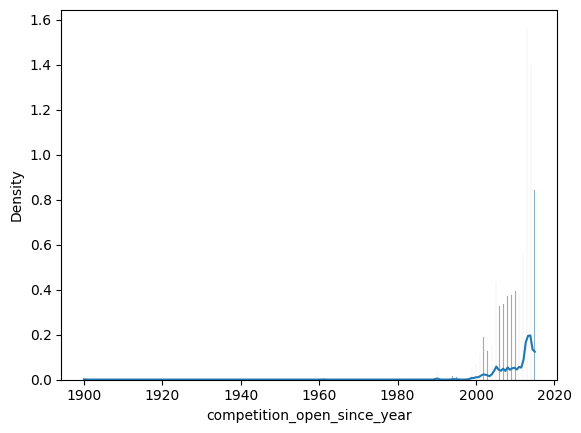

In [11]:
#Central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

m.columns = (['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

sns.histplot(df1_train['competition_open_since_year'], kde=True, stat="density")
#plt.ylim([0,0.0025]); plt.xlim([0,3000])


<Axes: xlabel='assortment', ylabel='sales'>

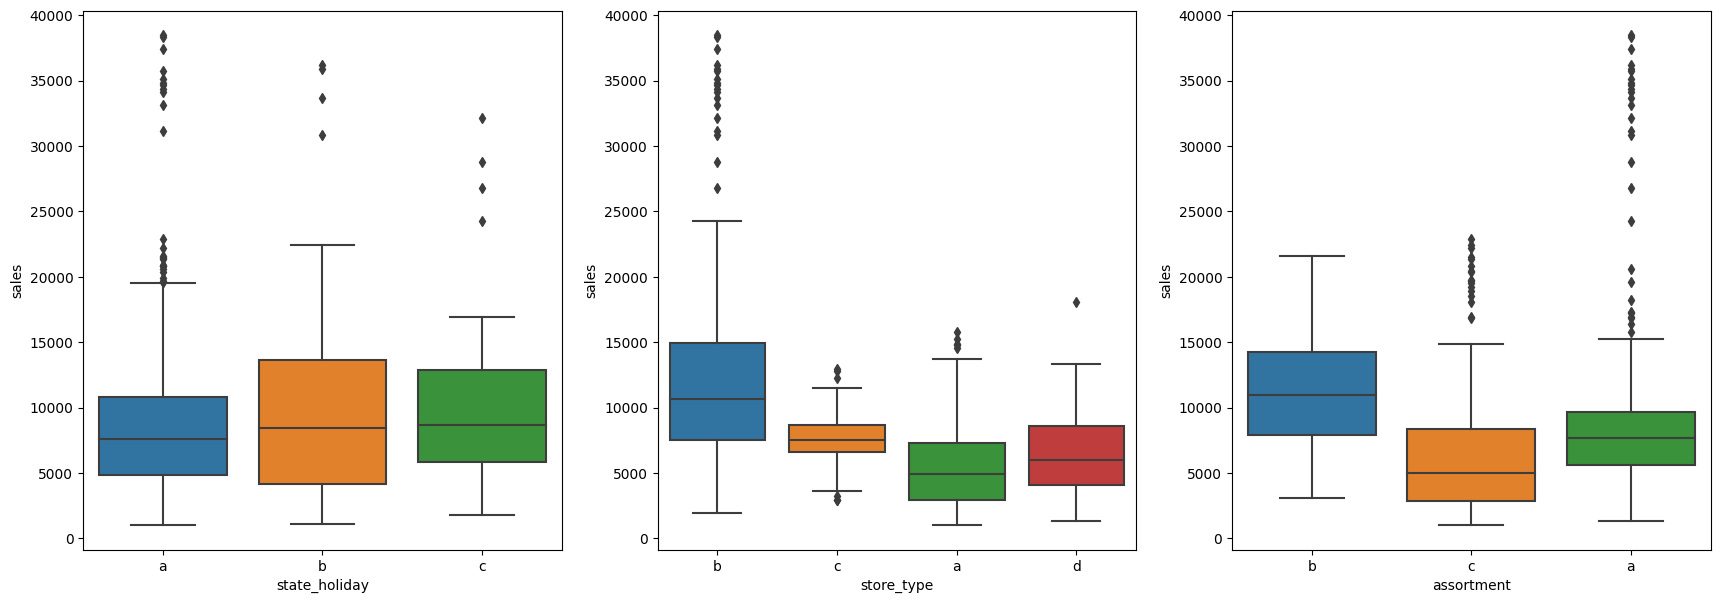

In [12]:
cat_attributes.apply(lambda x: x.unique().shape[0])

aux1 = df1_train[(df1_train['state_holiday'] != '0') & (df1_train['sales'] > 0)]

fig = plt.subplots(1, 3, figsize=(21, 7))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 FEATURE ENGINEERING

## 2.1 Mapa mental das hipoteses

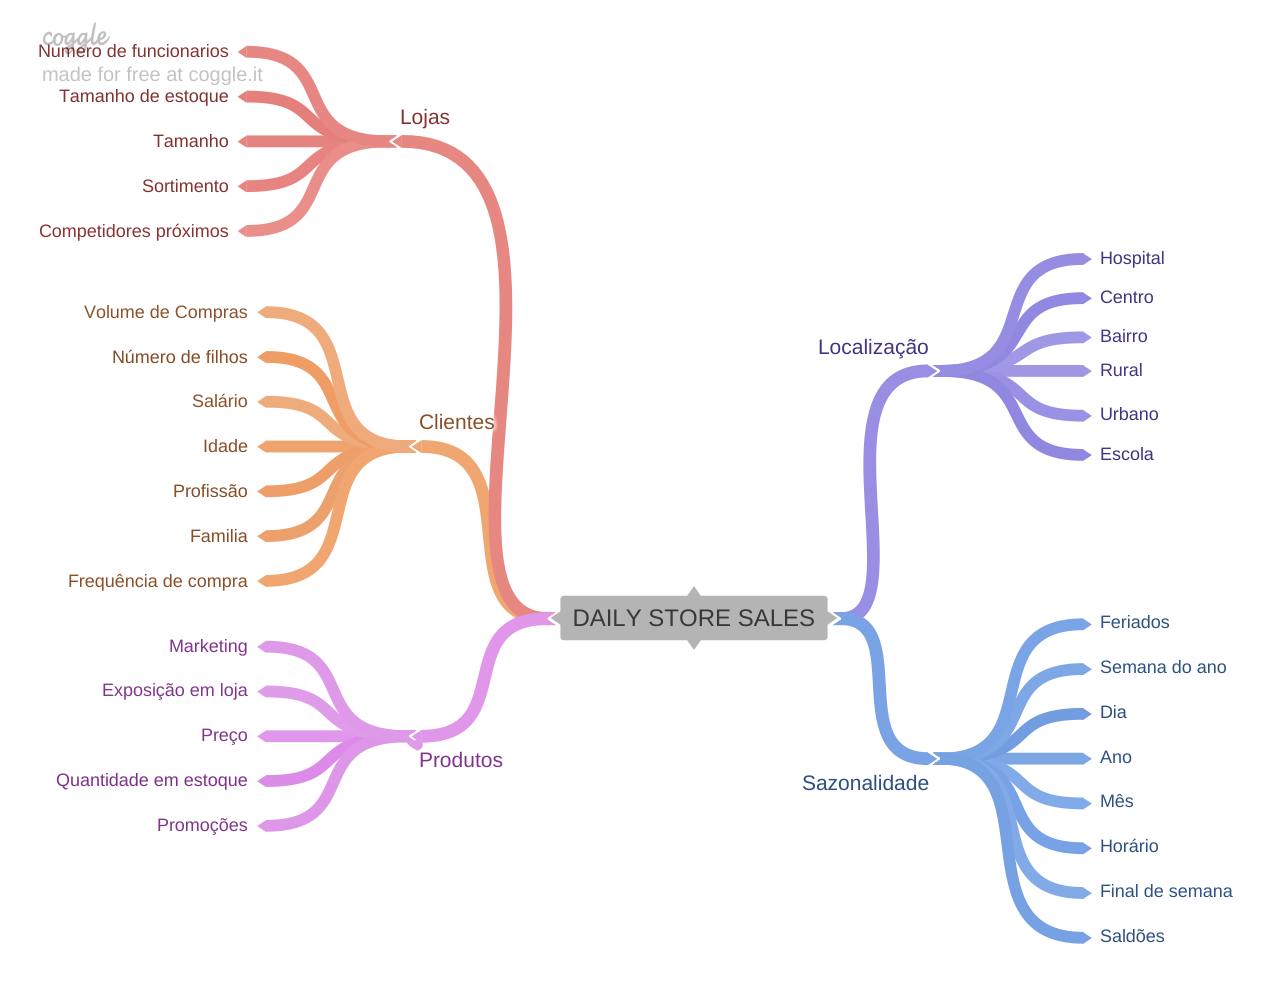

In [16]:
Image('images/mind_map_hipoteses.png')

## 2.2 Criação das hipoteses


## hipoteses  loja

**1.** Lojas com maior quadro de funcionarios deveriam vender mais;

**2.** Lojas com maior estoque deveriam vender mais;

**3.** Lojas com maior porte deveriam vender mais;

**4.** Lojas com menor porte deveriam vender menos;

**5.** Lojas com maior sortimento deveriam vender mais;

**6.** Lojas com competidores mais próximos deveriam vender menos;

**7.** Lojas com competidores à mais tempo deveriam vender mais.

## hipoteses do produto

**1.** Lojas que investem mais em marketing deveriam vender mais;

**2.** Lojas que expoem mais os produtos na vitrine deveriam vender mais;

**3.** Lojas que tem preços menores nos produtos deveriam vender mais;

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções mais agressivais deveriam vender mais;

**6.** Lojas com mais dias de promoção deveriam vender mais;

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

## hipoteses de tempo

**1.** Lojas que abrem durante o natal deveriam vender mais;

**2.** Lojas deveriam vender mais ao longo dos anos;

**3.** Lojas deveriam vender mais no segundo semestre do ano;

**4.** Lojas deveria vender mais após o dia 10 de cada mês;

**5.** Lojas deveriam vender menos aos finais de semana;

**6.** Lojas deveriam vender menos durante feriados escolares;

## Lista final de hipoteses

**1.** Lojas com maior sortimento deveriam vender mais;

**2.** Lojas com competidores mais próximos deveriam vender menos;

**3.** Lojas com competidores à mais tempo deveriam vender mais.

--------------------------------------------------------------------------------

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais;

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

--------------------------------------------------------------------------------

**7.** Lojas que abrem durante o natal deveriam vender mais;

**8.** Lojas deveriam vender mais ao longo dos anos;

**9.** Lojas deveriam vender mais no segundo semestre do ano;

**10.** Lojas deveria vender mais após o dia 10 de cada mês;

**11.** Lojas deveriam vender menos aos finais de semana;

**12.** Lojas deveriam vender menos durante feriados escolares;

In [12]:
df2_train = df1_train.copy()

## 2.3 Feature Engineering

In [13]:
#Year
df2_train['year'] = df2_train['date'].dt.year

#Month
df2_train['month'] = df2_train['date'].dt.month

#Day
df2_train['day'] = df2_train['date'].dt.day

#Week of Year
df2_train['week_of_year'] = df2_train['date'].dt.isocalendar().week

#Year week
df2_train['year_week'] = df2_train['date'].dt.strftime('%Y-%W')


#competition since
df2_train['competition_since'] = df2_train.apply(lambda x: datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1),axis=1)
df2_train['competition_time_month'] = ((df2_train['date']-df2_train['competition_since'])/30).apply(lambda x: x.days).astype(int)

#Promo since
df2_train['promo_since'] = df2_train['promo2_since_year'].astype(str)+'-'+df2_train['promo2_since_week'].astype(str)
df2_train['promo_since'] = df2_train['promo_since'].apply(lambda x: datetime.strptime(x+'-1','%Y-%W-%w')-timedelta(days=7))
df2_train['promo_time_week'] = ((df2_train['date']-df2_train['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment
df2_train['assortment'] = df2_train['assortment'].apply(lambda x: 'basic' if x=='a' else 'extra' if x=='b' else 'extended')

#state holiday
df2_train['state_holiday'] = df2_train['state_holiday'].apply(lambda x: 'public_holiday' if x=='a' else 'easter_holiday' if x=='b' else 'christmas' if x == 'c' else 'regular_day')

# 3.0 FILTRAGEM DE VARIAVEIS

In [14]:
df3_train = df2_train.copy()

## Filtragem das linhas

In [15]:
df3_train = df3_train[df3_train['open'] != 0]
df3_train = df3_train[df3_train['sales'] > 0]

## Seleção das colunas

In [16]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3_train = df3_train.drop(cols_drop, axis=1)

# 4.0 ANALISE EXPLORATORIA DOS DADOS

In [17]:
df4_train = df3_train.copy()
num_attributes = df4_train.select_dtypes(include=['int64', 'float64'])
cat_attributes = df4_train.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

## Analise univariada

<Axes: xlabel='sales', ylabel='Density'>

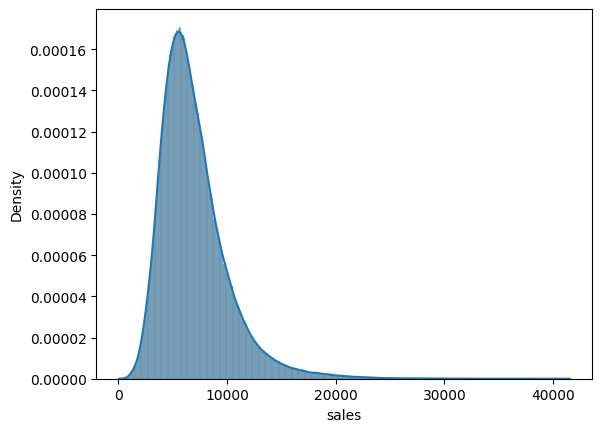

In [32]:
#Response variable

sns.histplot(df4_train['sales'], kde=True, stat="density")


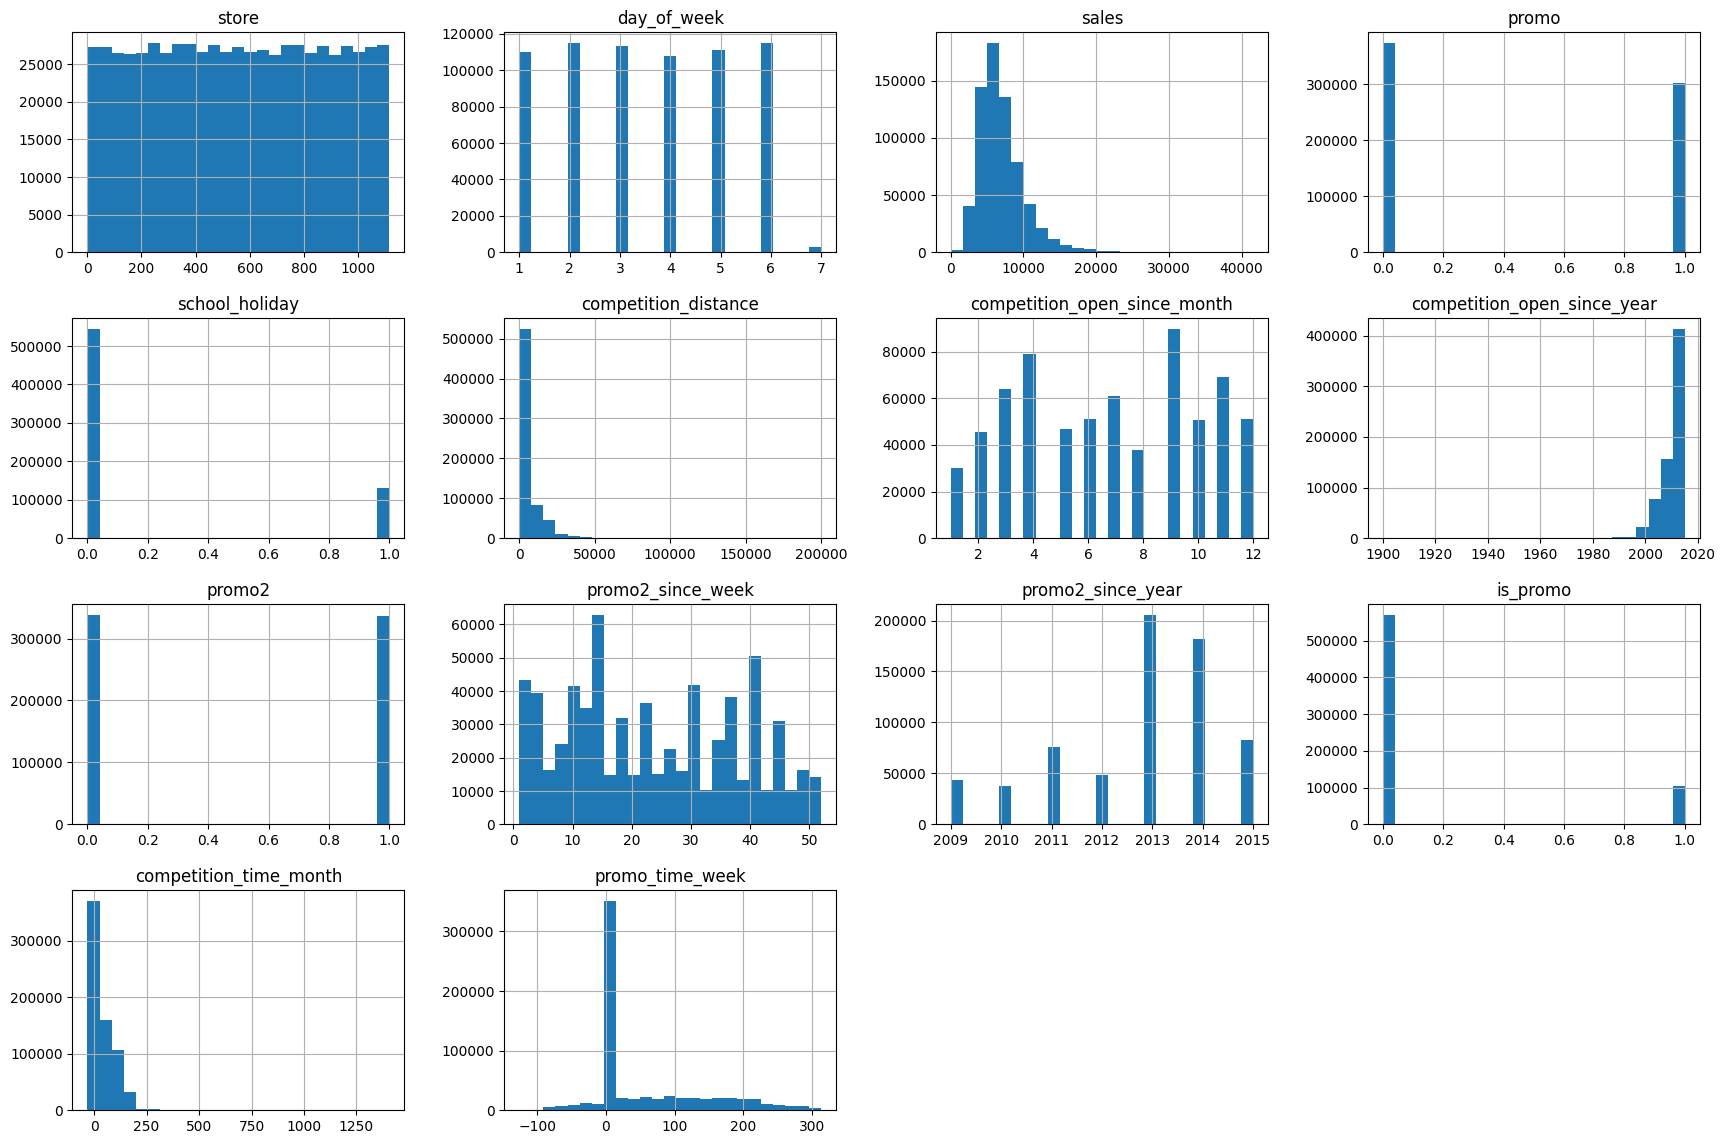

In [40]:
#numerical variables
num_attributes.hist(bins=25, figsize=(21,14));




In [32]:
#variaveis categoricas
df4_train['state_holiday'].drop_duplicates()

0           regular_day
132      public_holiday
8913     easter_holiday
59400         christmas
Name: state_holiday, dtype: object

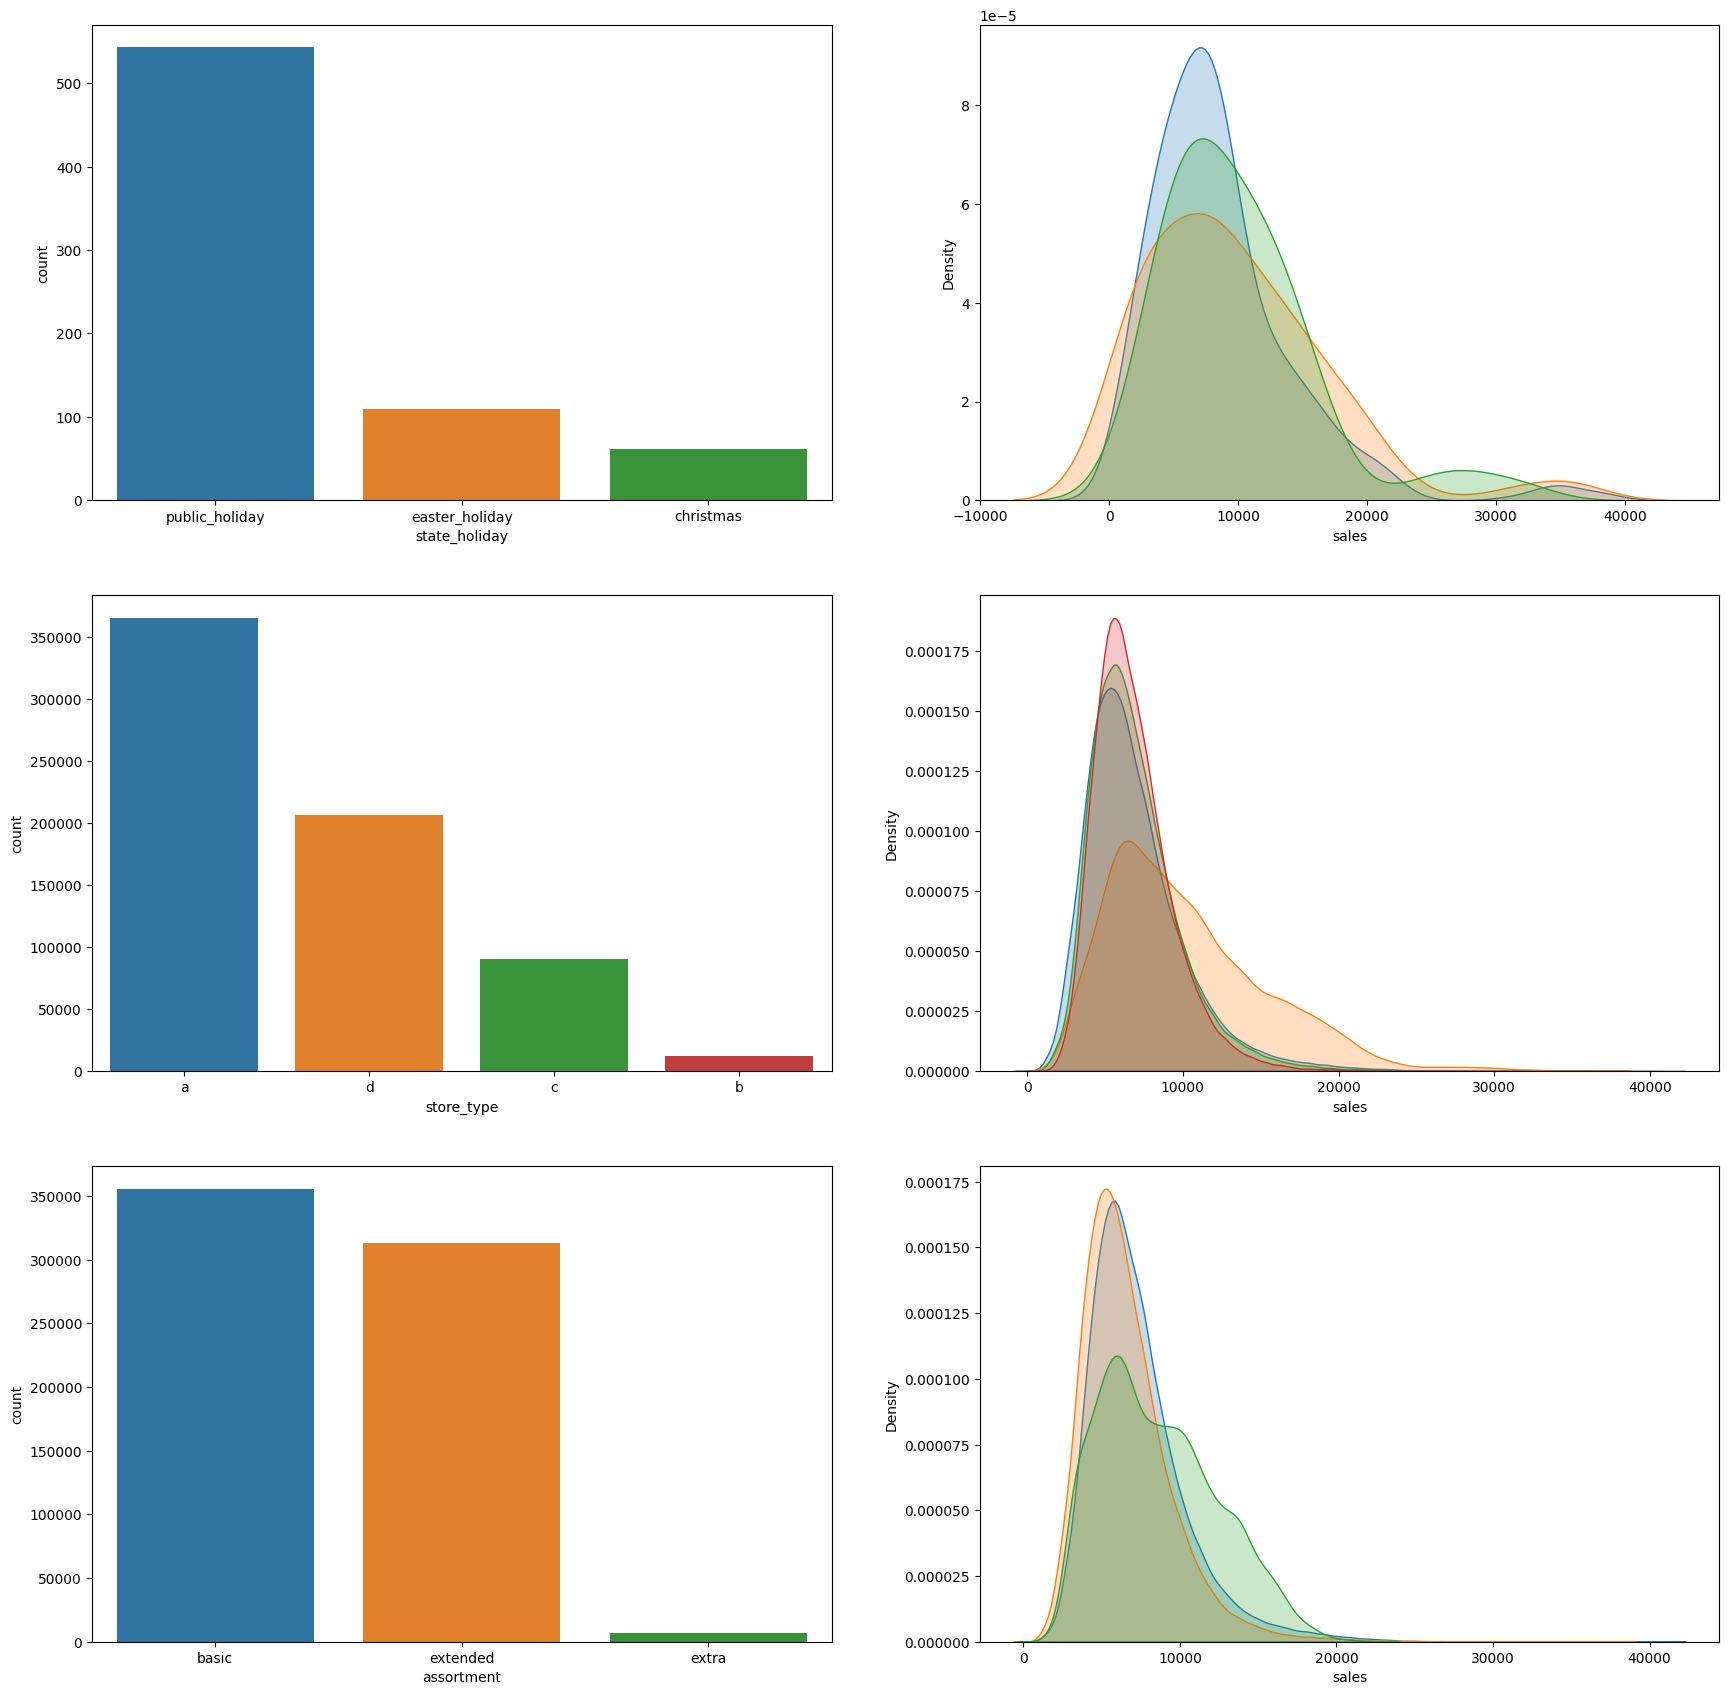

In [77]:
#state holiday
a=df4_train[df4_train['state_holiday'] != 'regular_day']
fig = plt.subplots(3,2,figsize=(21,21))
plt.subplot(3,2,1)
sns.countplot(a,x='state_holiday')

plt.subplot(3,2,2)
sns.kdeplot(df4_train[df4_train['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True);
sns.kdeplot(df4_train[df4_train['state_holiday'] == 'easter_holiday']['sales'], label='public_holiday', fill=True);
sns.kdeplot(df4_train[df4_train['state_holiday'] == 'christmas']['sales'], label='public_holiday', fill=True);

#store_type
plt.subplot(3,2,3)
sns.countplot(df4_train,x='store_type')

plt.subplot(3,2,4)
sns.kdeplot(df4_train[df4_train['store_type'] == 'a']['sales'], label='a', fill=True);
sns.kdeplot(df4_train[df4_train['store_type'] == 'b']['sales'], label='b', fill=True);
sns.kdeplot(df4_train[df4_train['store_type'] == 'c']['sales'], label='c', fill=True);
sns.kdeplot(df4_train[df4_train['store_type'] == 'd']['sales'], label='d', fill=True);

#assortment
plt.subplot(3,2,5)
sns.countplot(df4_train,x='assortment')

plt.subplot(3,2,6)
sns.kdeplot(df4_train[df4_train['assortment'] == 'extended']['sales'], label='extended', fill=True);
sns.kdeplot(df4_train[df4_train['assortment'] == 'basic']['sales'], label='basic', fill=True);
sns.kdeplot(df4_train[df4_train['assortment'] == 'extra']['sales'], label='extra', fill=True);


## Analise bivariada

### H1 lojas com maior sortimentos deveriam vender mais

***FALSA*** Na verdade lojas com maior sortimento vende menos


<Axes: xlabel='year_week'>

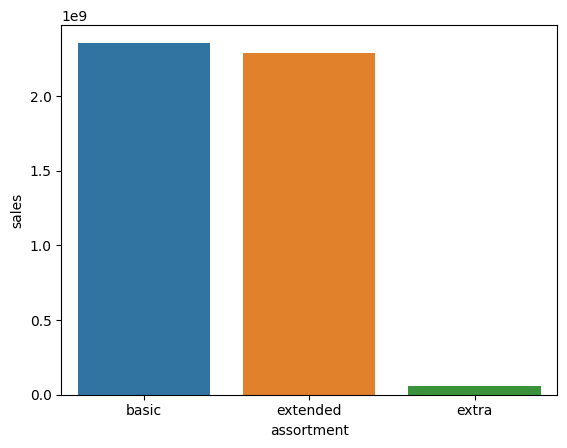

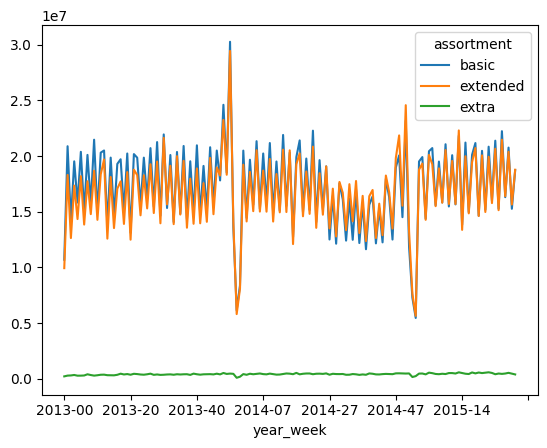

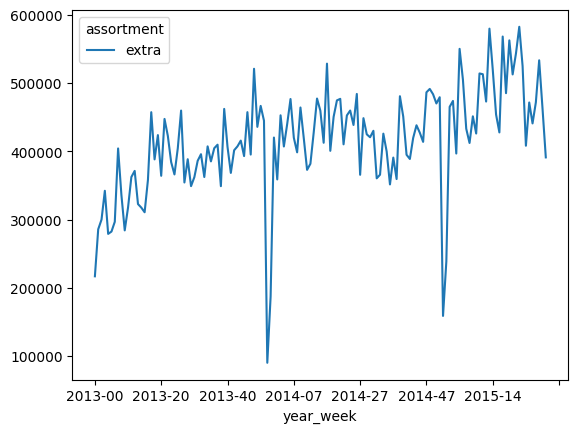

In [82]:
aux1 = df4_train[['assortment','sales']].groupby('assortment').sum().reset_index()

sns.barplot(x='assortment', y='sales', data=aux1);

aux2 = df4_train[['year_week','assortment','sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot()

aux3 = aux2[aux2['assortment'] =='extra']
aux3.pivot(index='year_week', columns='assortment', values='sales').plot()


### H2 lojas com competidores mais próximos deveriam vender menos
***FALSE*** Loja com competidores próximos vendem mais e não menos

/tmp/ipykernel_38469/1160200067.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1);


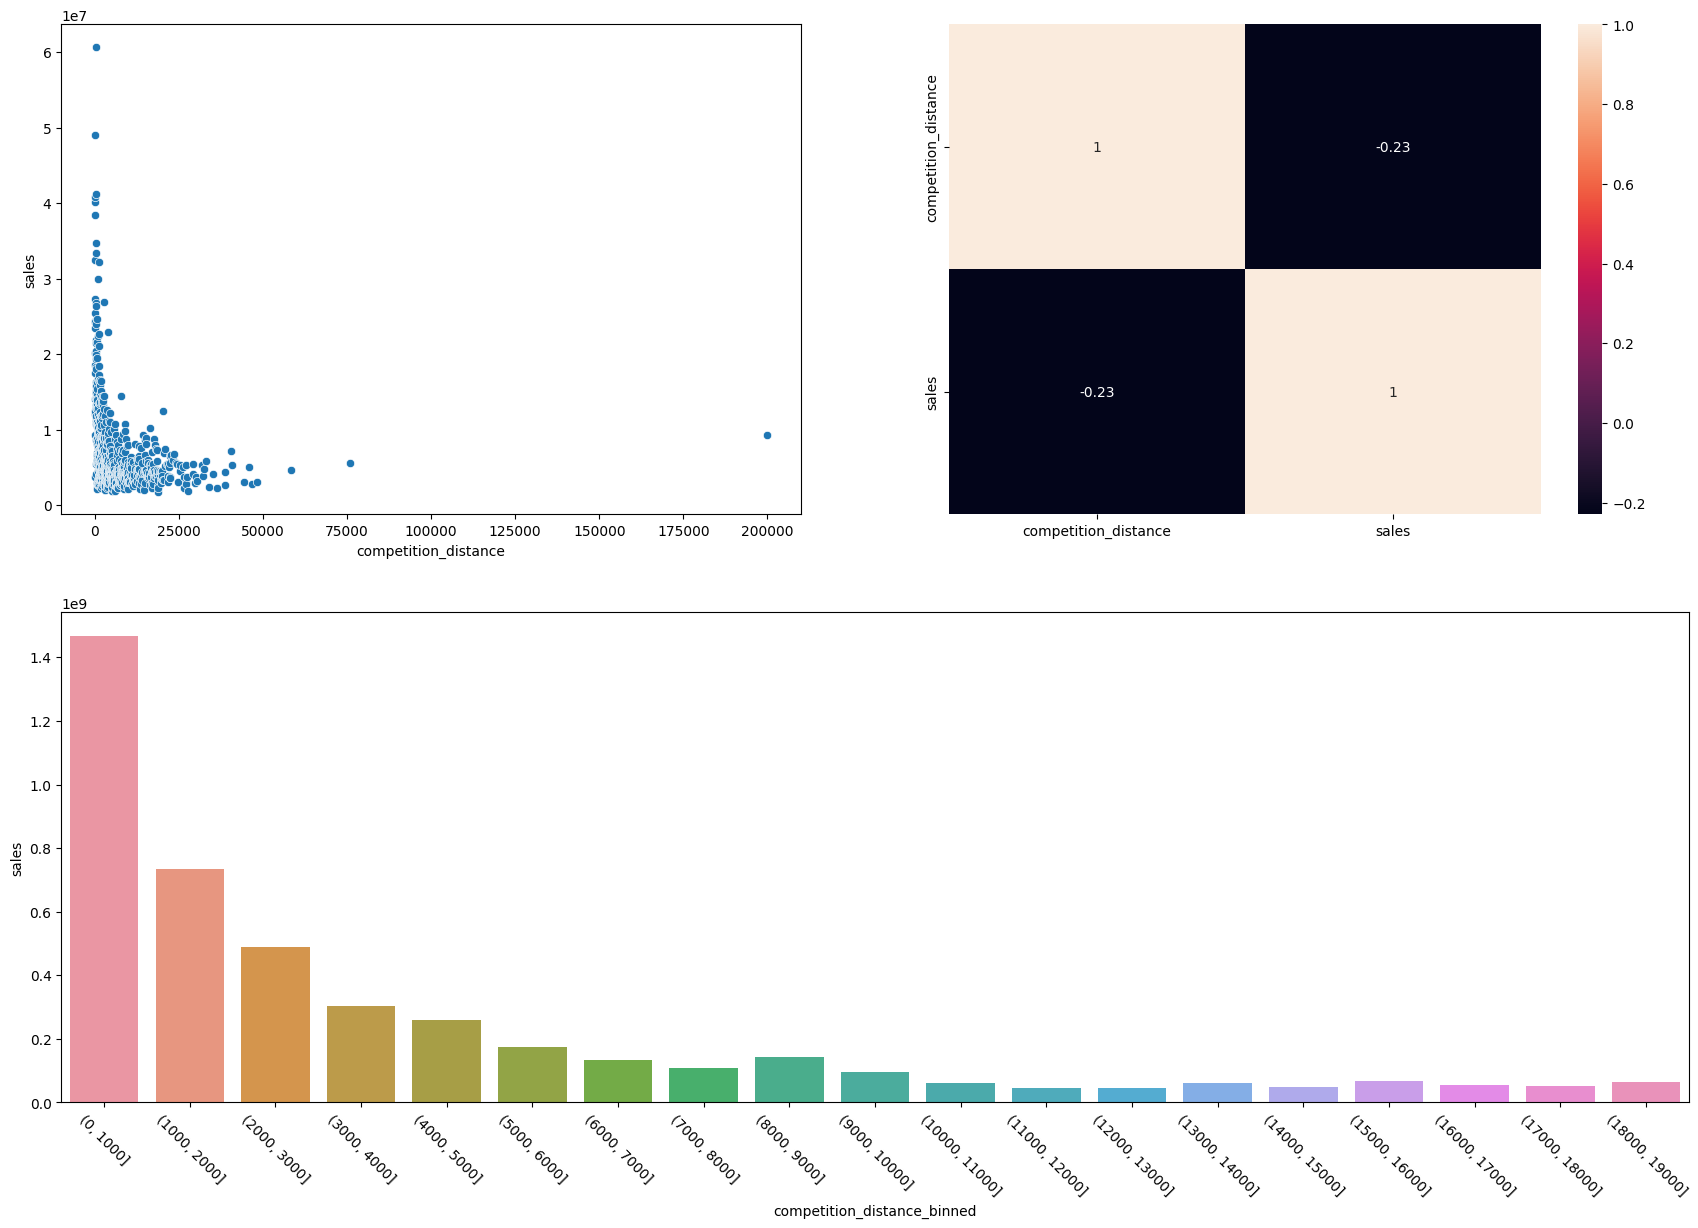

In [105]:
aux1 = df4_train[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

bins = list(np.arange(0,20000,1000))

fig = plt.subplots(figsize=(21,14));
plt.subplot(2,2,1);
sns.scatterplot(x='competition_distance', y='sales', data=aux1);

plt.subplot(2,2,2);
sns.heatmap(aux1.corr(method='pearson'), annot=True);

aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins = bins)
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()


plt.subplot(2,2,(3,4));
sns.barplot(x='competition_distance_binned', y='sales', data=aux2);
plt.xticks(rotation=-45);



### H3 loja com competidores a mais tempo deveriam vender mais
***FALSO*** loja com competidores a mais tempo vendem menos

/tmp/ipykernel_38469/3018046446.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,(3,4))


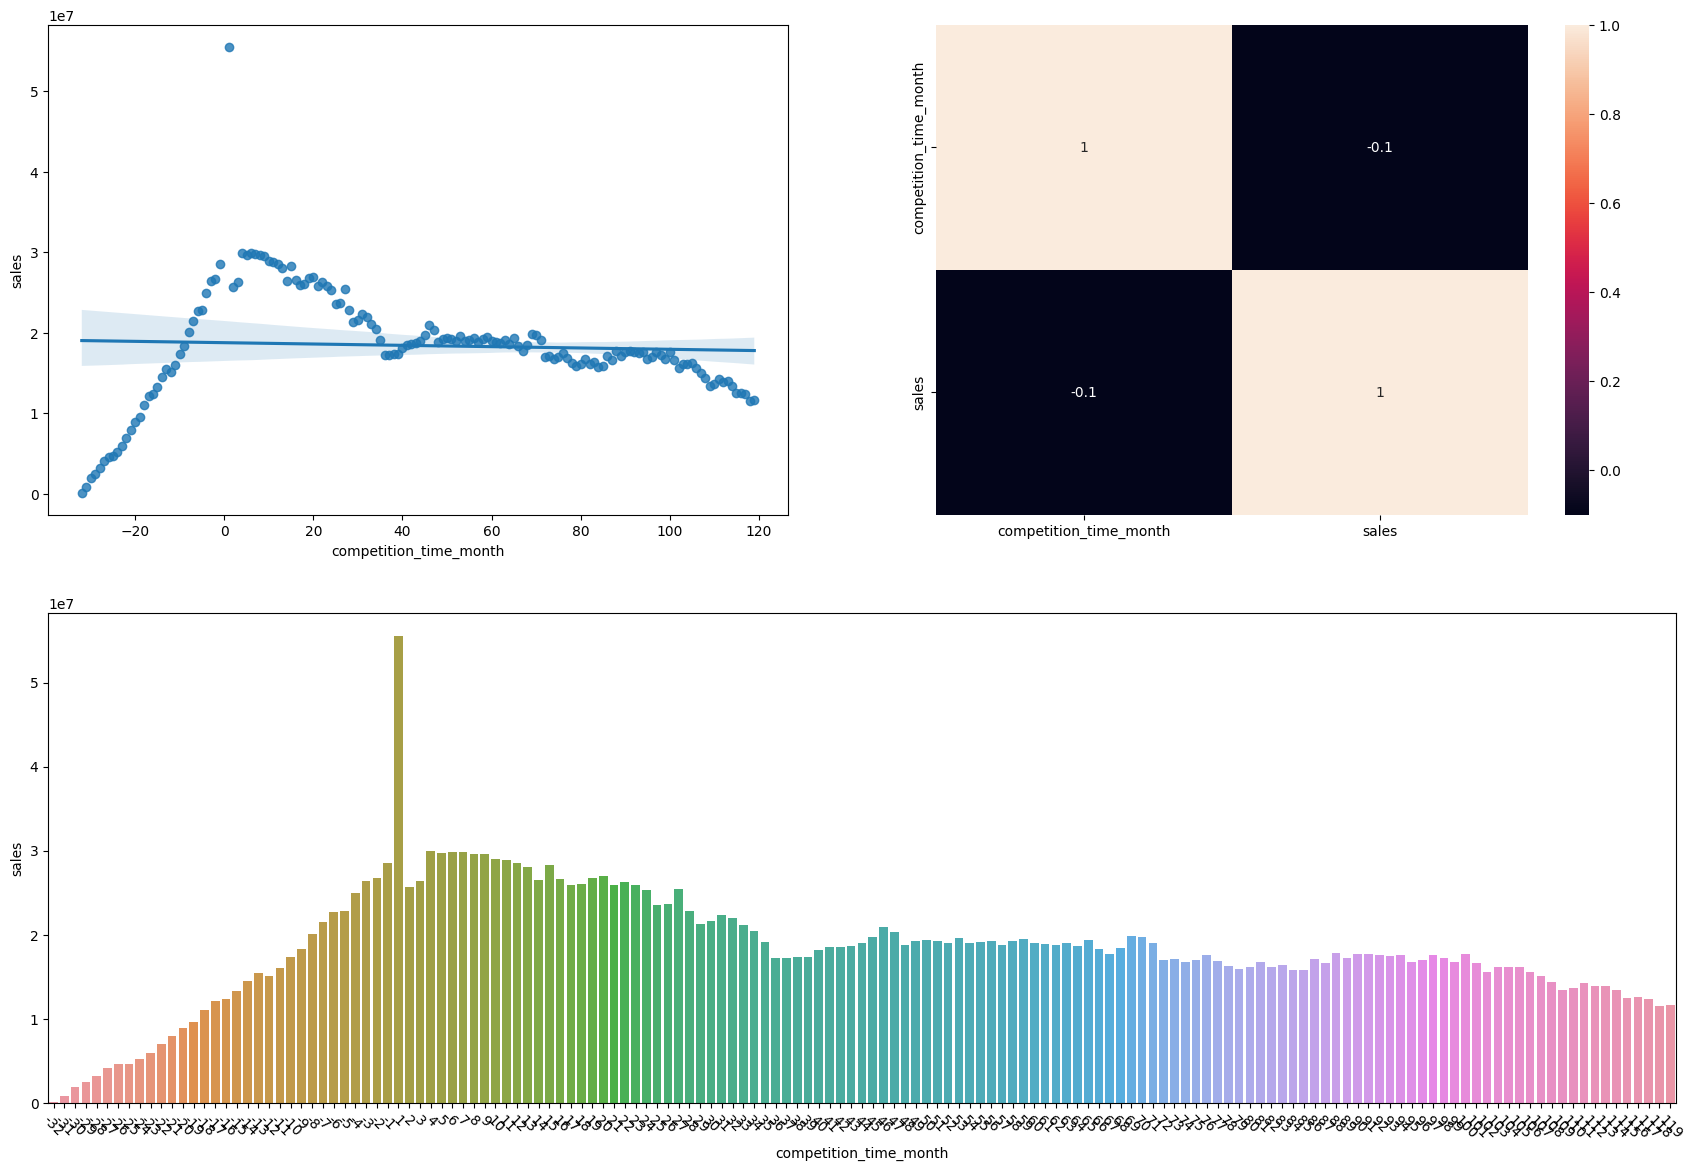

In [120]:
plt.subplots(2,2,figsize=(21,14))

aux1 = df4_train[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[aux1['competition_time_month']<120]
aux2 = aux2[aux2['competition_time_month'] != 0]


plt.subplot(2,2,1)
sns.regplot(x='competition_time_month', y='sales', data=aux2);

plt.subplot(2,2,2)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

plt.subplot(2,2,(3,4))
sns.barplot(x='competition_time_month', y='sales', data=aux2);
plt.xticks(rotation=-45);


### H4 Lojas com promoções ativas por mais tempo deveriam vender mais.

***FALSO*** Ela vende regularmente por um periodo, porém tempo depois passa a cair

/tmp/ipykernel_38469/602934082.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,(3,6))


<Axes: >

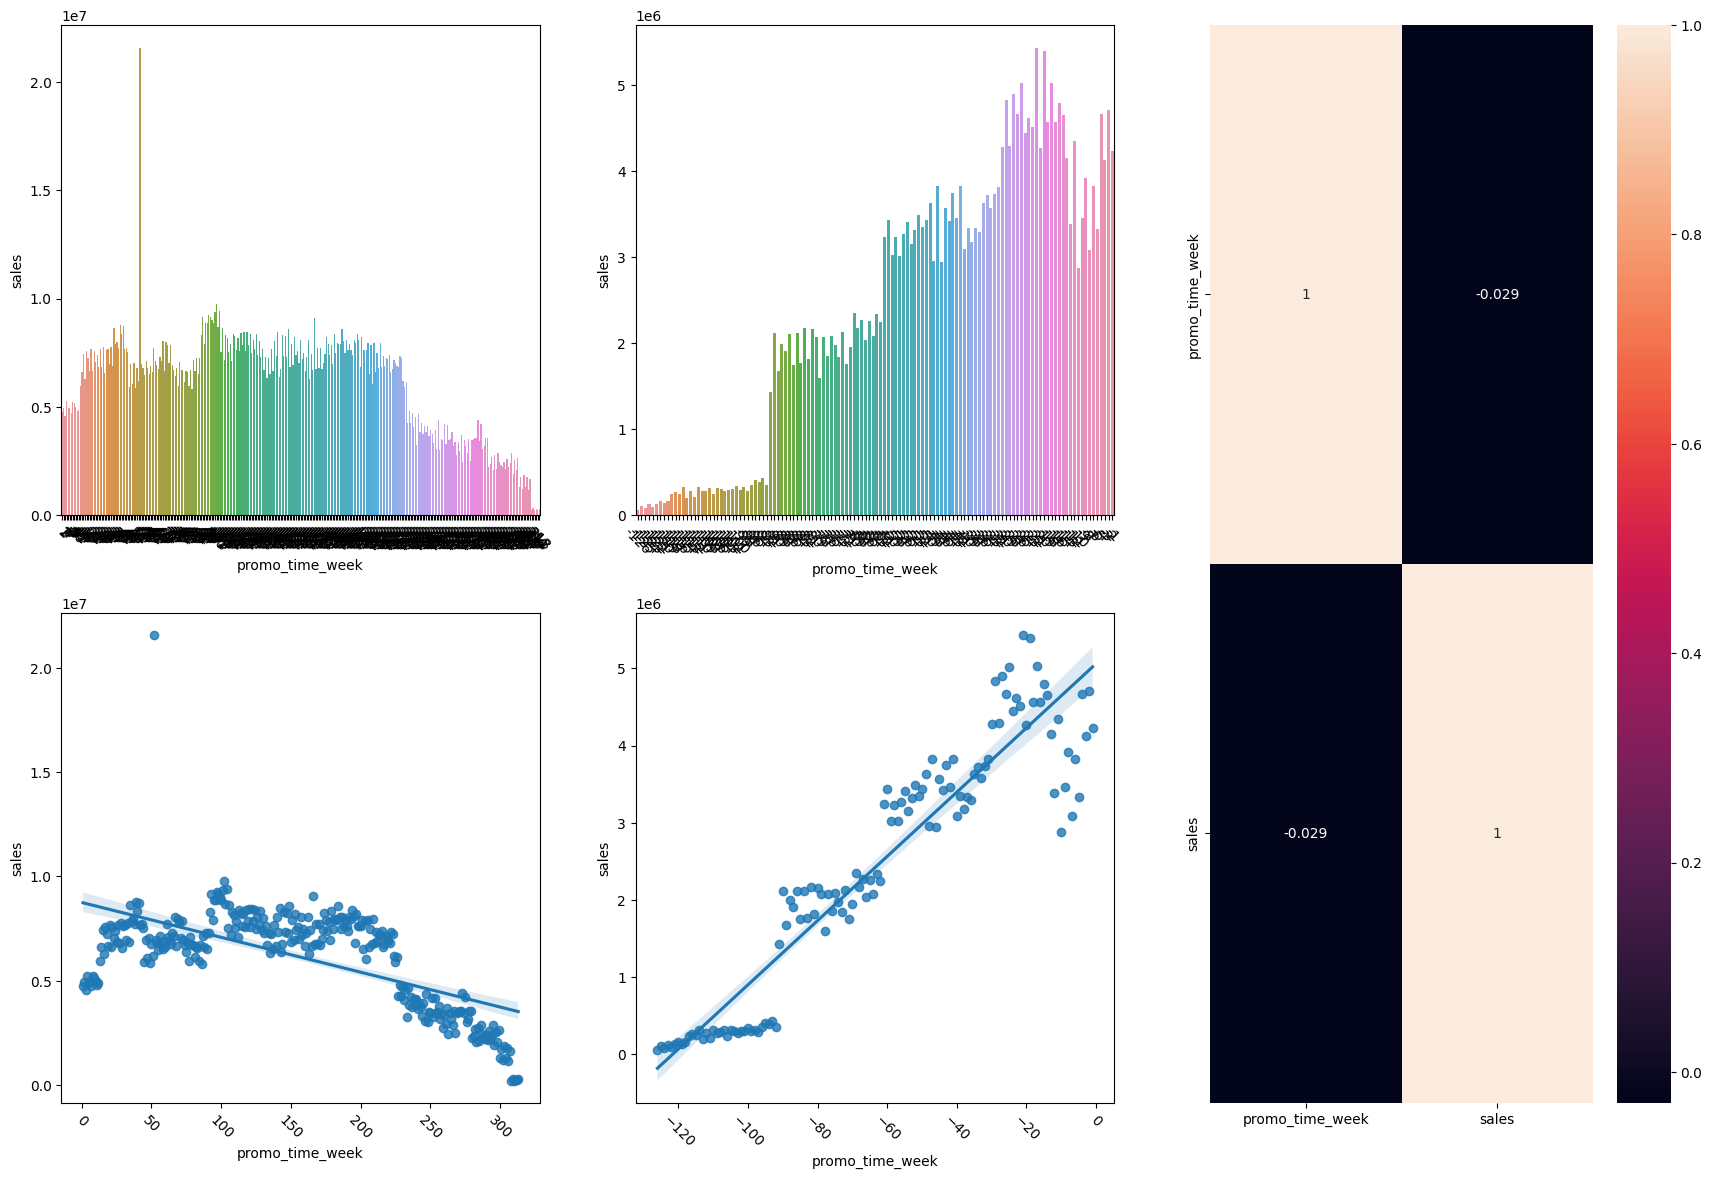

In [134]:

aux1 = df4_train[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

aux2 = aux1[aux1['promo_time_week']>0] #periodo extendido
aux3 = aux1[aux1['promo_time_week']<0] #periodo regular

fig = plt.subplots(2,3,figsize=(21,14))
plt.subplot(2,3,1)
sns.barplot(x='promo_time_week', y='sales', data=aux2);
plt.xticks(rotation=-45);

plt.subplot(2,3,4)
sns.regplot(x='promo_time_week', y='sales', data=aux2);
plt.xticks(rotation=-45);

plt.subplot(2,3,2)
sns.barplot(x='promo_time_week', y='sales', data=aux3);
plt.xticks(rotation=-45);

plt.subplot(2,3,5)
sns.regplot(x='promo_time_week', y='sales', data=aux3);
plt.xticks(rotation=-45);

plt.subplot(2,3,(3,6))
sns.heatmap(aux1.corr(method='pearson'), annot=True)

### <s>H5 Lojas com mais dias de promoção deveriam vender mais</s>

### H6 Lojas com mais promoções consecutivas deveriam vender mais

***FALSO*** Lojas com mais promo consec, vendem menos

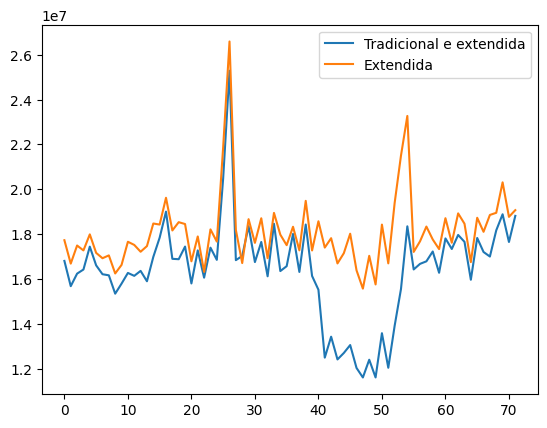

In [142]:
df4_train[['promo','promo2','sales']].groupby(['promo', 'promo2']).sum().reset_index()


aux1 = df4_train[df4_train['promo'] == 1]
aux1 = aux1[aux1['promo2'] == 1][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4_train[df4_train['promo'] == 1]
aux2 = aux2[aux2['promo2'] == 0][['year_week','sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Tradicional e extendida', 'Extendida'])

### H7 Lojas abertas durante o feriado de Natal deveriam vender mais

***FALSA*** Lojas abertas durante o feriado de natal vendem menos

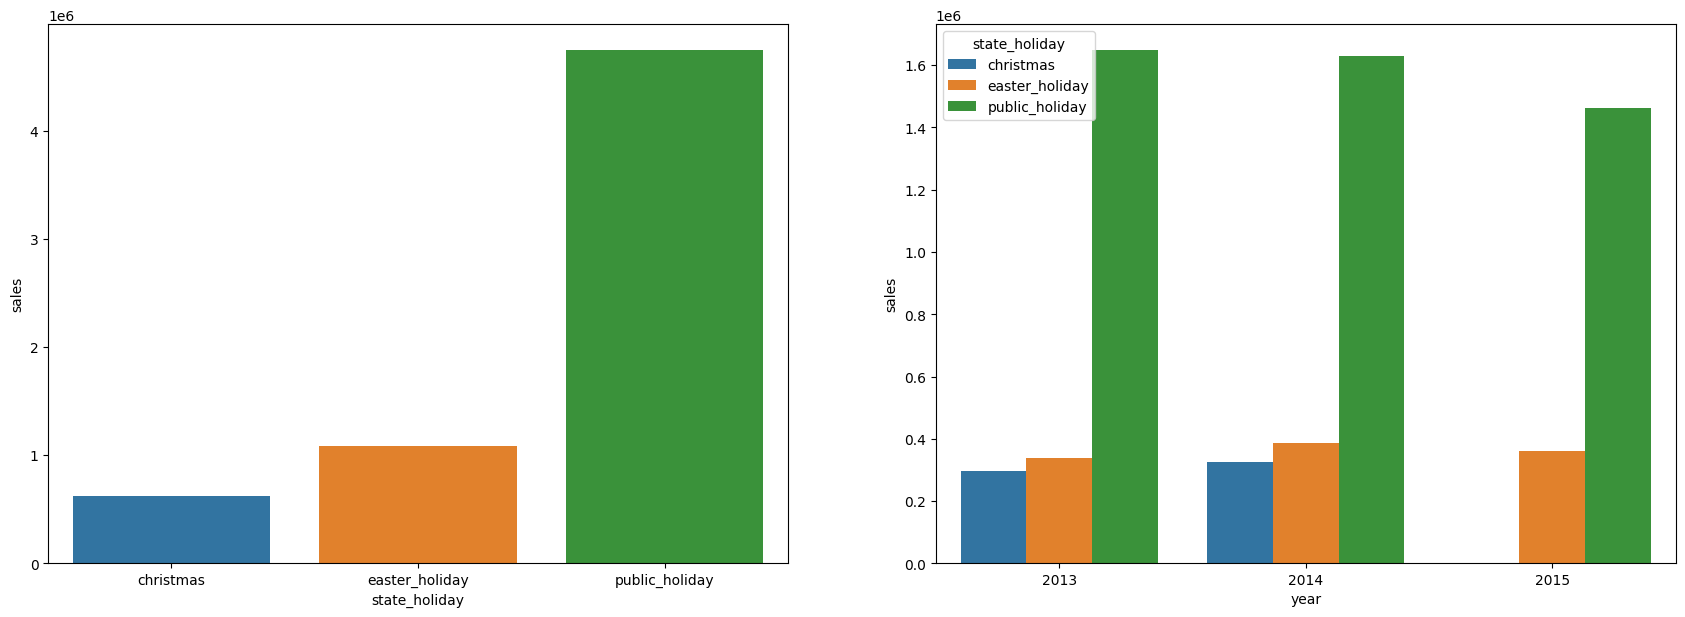

In [152]:
aux = df4_train[df4_train['state_holiday'] != 'regular_day']

fig=plt.subplots(1,2,figsize=(21,7))

plt.subplot(1,2,1)
aux1 = aux[['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data = aux1);

plt.subplot(1,2,2)
aux2 = aux[['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux2);

### H8 Lojas deveriam vendar mais ao longo dos anos

***FALSO***


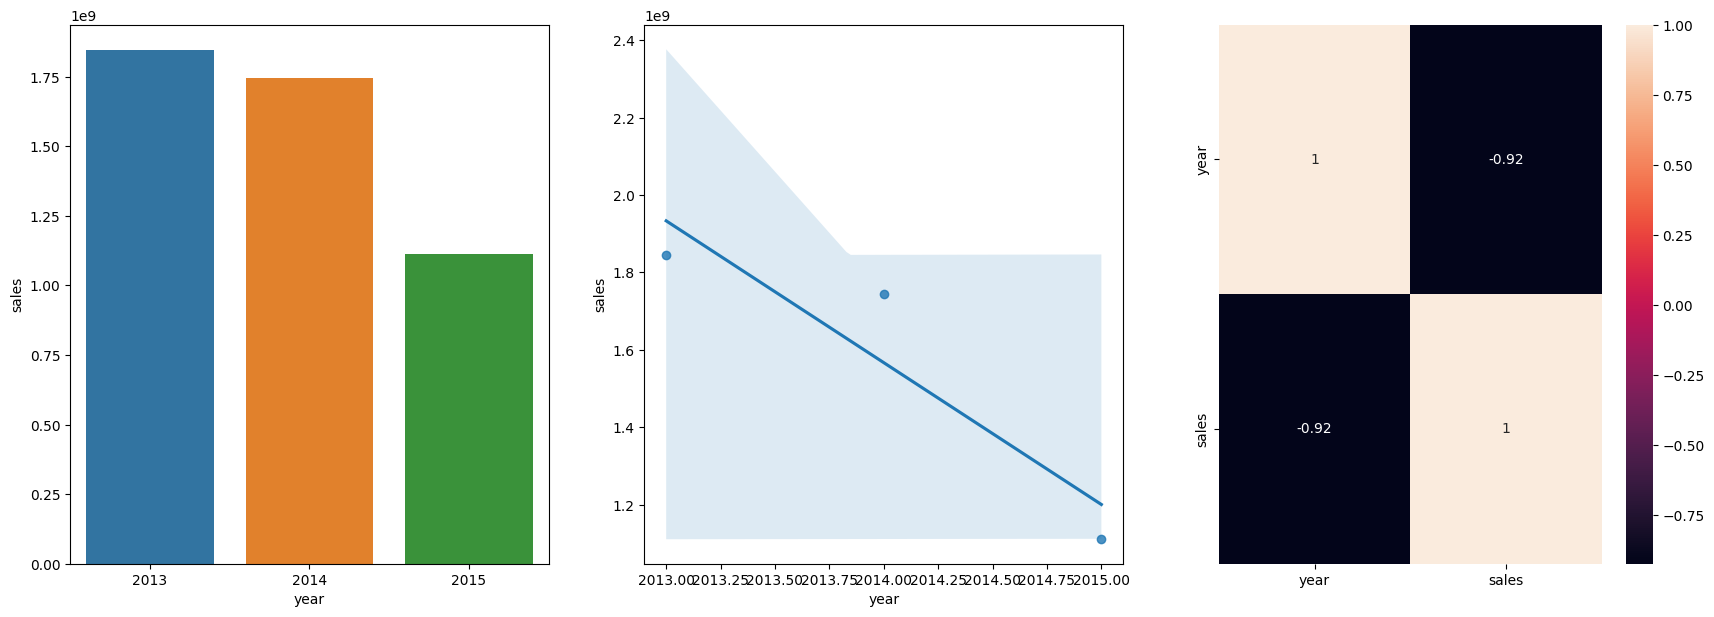

In [155]:
aux1 = df4_train[['year','sales']].groupby('year').sum().reset_index()

fig=plt.subplots(1,3,figsize=(21,7))

plt.subplot(1,3,1)
sns.barplot(x='year', y='sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x='year', y='sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### H9 Lojas deveriam vender mais no segundo semestre do ano

***FALSO***

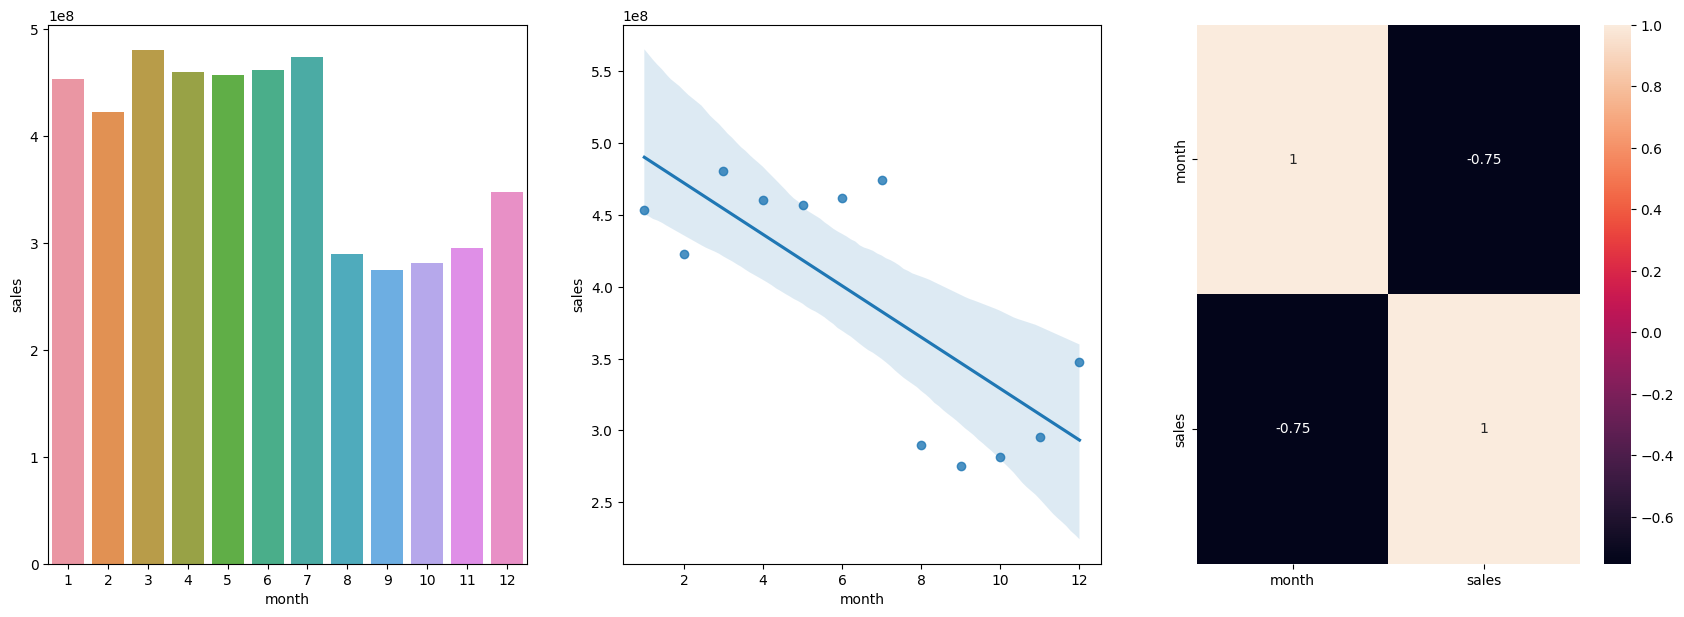

In [156]:
aux1 = df4_train[['month','sales']].groupby('month').sum().reset_index()

fig=plt.subplots(1,3,figsize=(21,7))

plt.subplot(1,3,1)
sns.barplot(x='month', y='sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x='month', y='sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### H11 Lojas deveriam vendar mais depois do dia 10 de cada mês

***VERDADEIRO***

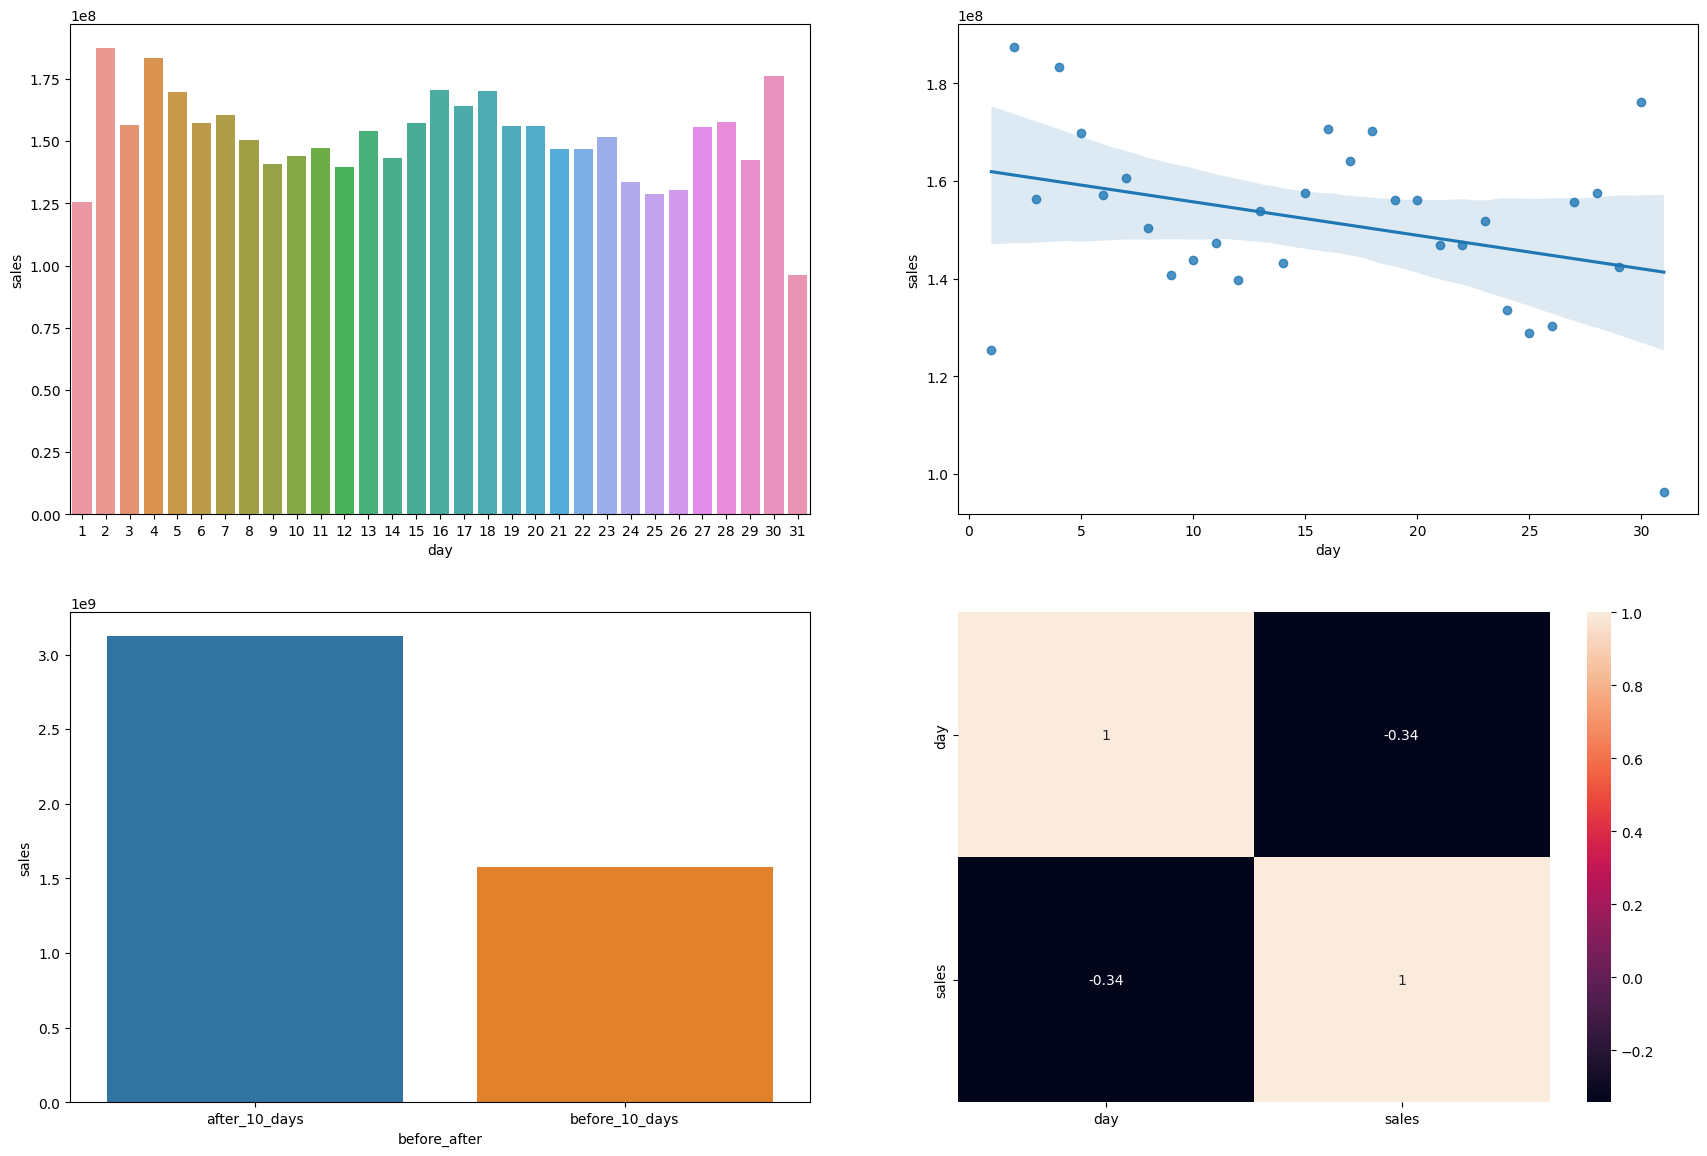

In [159]:
aux1 = df4_train[['day','sales']].groupby('day').sum().reset_index()

fig=plt.subplots(2,2,figsize=(21,14))

plt.subplot(2,2,1)
sns.barplot(x='day', y='sales', data = aux1);

plt.subplot(2,2,2)
sns.regplot(x='day', y='sales', data = aux1);

plt.subplot(2,2,4)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x<= 10 else 'after_10_days')
aux2 = aux1[['before_after','sales']].groupby('before_after').sum().reset_index()

plt.subplot(2,2,3)
sns.barplot(x='before_after', y='sales', data = aux2);


### H12 Lojas deveriam vender menos aos finais de semana

***Verdadeiro***

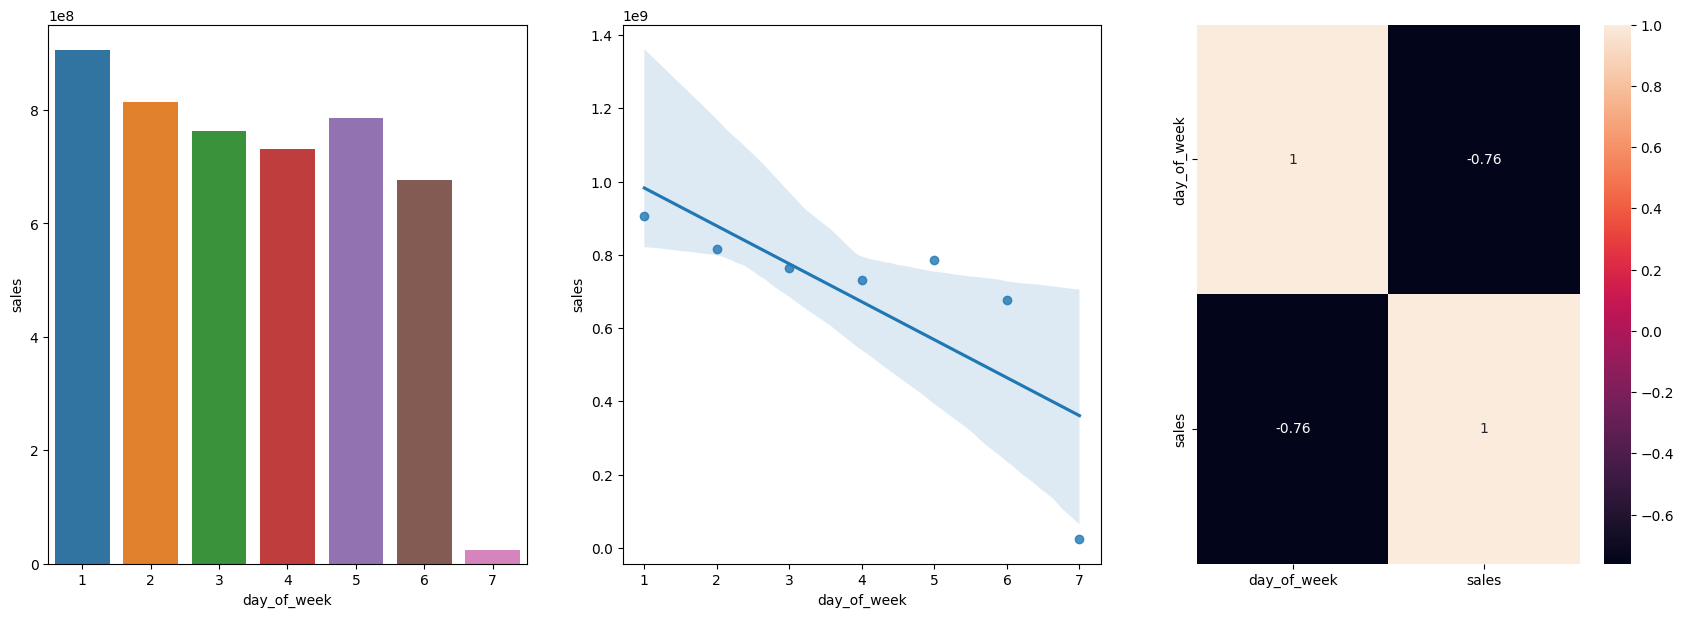

In [160]:
aux1 = df4_train[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

fig=plt.subplots(1,3,figsize=(21,7))

plt.subplot(1,3,1)
sns.barplot(x='day_of_week', y='sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x='day_of_week', y='sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

### H13 Lojas deveriam vender menos durante os feriados escolares.

***Verdadeiro***, Exceto no mes de agosto

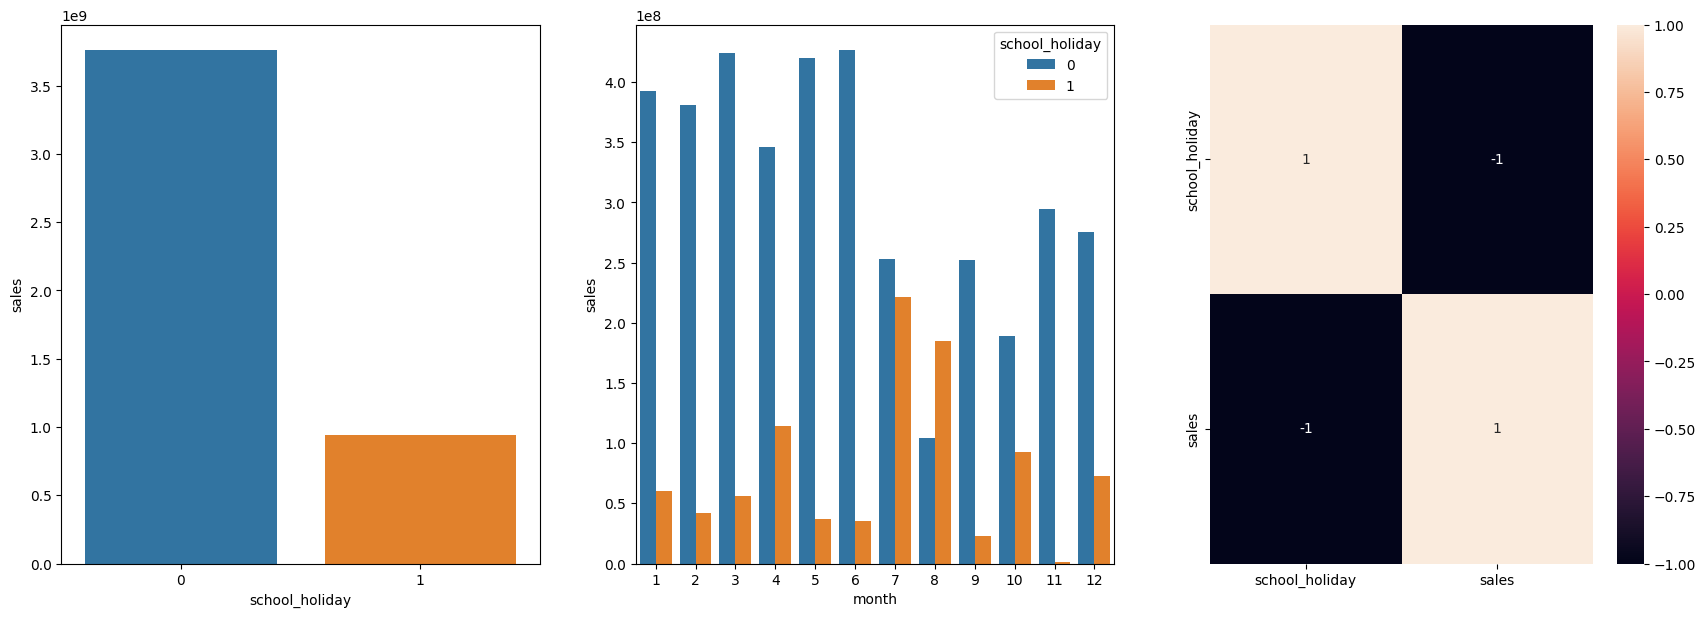

In [166]:
aux1 = df4_train[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
aux2 = df4_train[['month', 'school_holiday','sales']].groupby(['month', 'school_holiday']).sum().reset_index()

fig=plt.subplots(1,3,figsize=(21,7))

plt.subplot(1,3,1)
sns.barplot(x='school_holiday', y='sales', data = aux1);

plt.subplot(1,3,2)
sns.barplot(x='month', y='sales', hue='school_holiday', data = aux2);

'''plt.subplot(1,3,2)
sns.regplot(x='school_holiday', y='sales', data = aux1);'''

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True);

## Analise multivariada

### Numericas

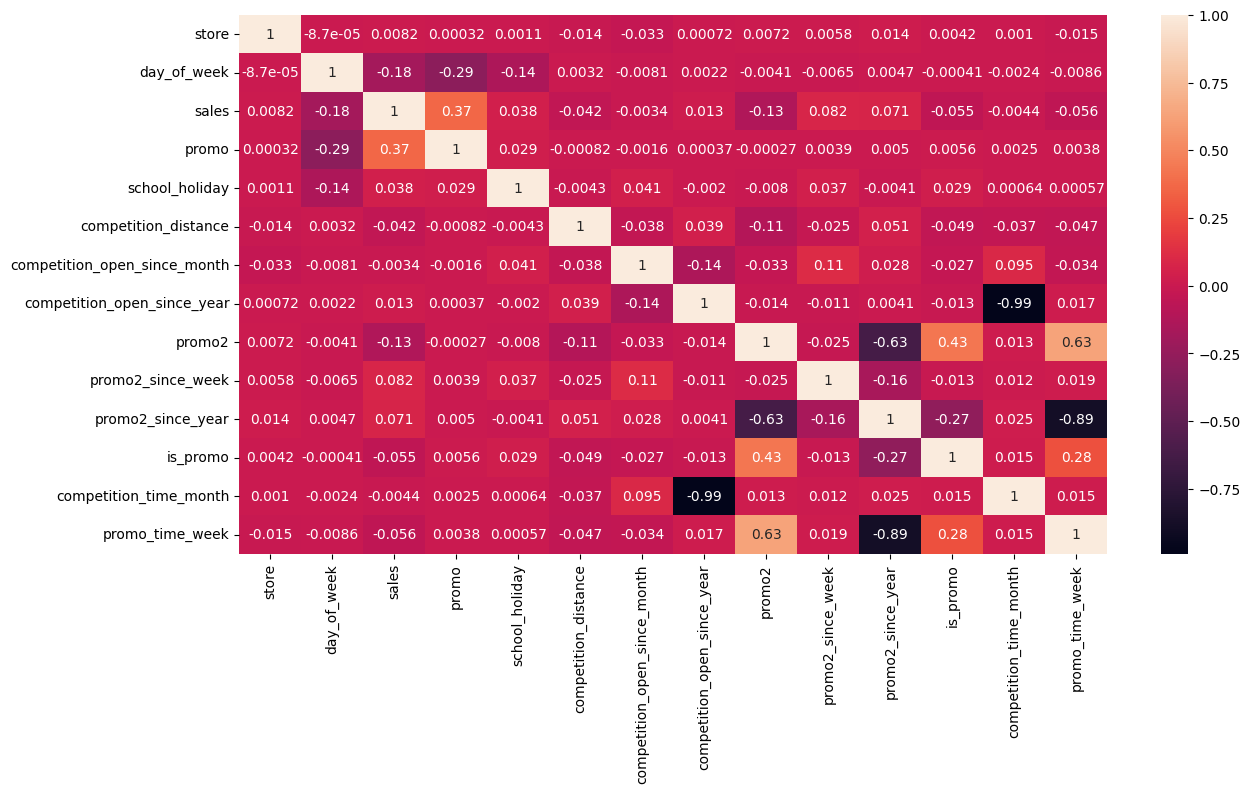

In [24]:
fig = plt.figure(figsize=(14,7))
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True);

### categorical

<Axes: >

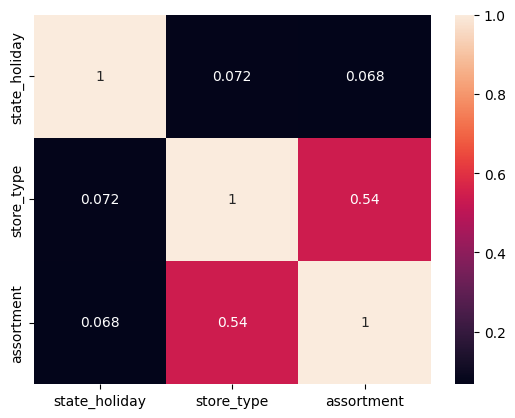

In [41]:


a = cat_attributes

cramer_v(a['state_holiday'],a['store_type'])

a1 = cramer_v(a['state_holiday'],a['state_holiday'])
a2 = cramer_v(a['state_holiday'],a['store_type'])
a3 = cramer_v(a['state_holiday'],a['assortment'])

a4 = cramer_v(a['store_type'],a['state_holiday'])
a5 = cramer_v(a['store_type'],a['store_type'])
a6 = cramer_v(a['store_type'],a['assortment'])

a7 = cramer_v(a['assortment'],a['state_holiday'])
a8 = cramer_v(a['assortment'],a['store_type'])
a9 = cramer_v(a['assortment'],a['assortment'])

d = pd.DataFrame({'state_holiday': [a1,a2,a3],
              'store_type': [a4,a5,a6],
              'assortment': [a7,a8,a9]})

d = d.set_index(d.columns)
sns.heatmap(d, annot=True)

# 5 DATA PREPARATION

In [77]:
df5_train = df4_train.copy()
a = df5_train.select_dtypes(include=['int32', 'int64', 'float64'])

## Normalização

### Nenhuma variavel com distribuição normal

## Rescaling

In [78]:
rs = RobustScaler()
mms = MinMaxScaler()

#sns.boxplot(df5_train['competition_distance'])
df5_train['competition_distance']=rs.fit_transform(a[['competition_distance']].values)

#sns.boxplot(df5_train['competition_time_month'])
df5_train['competition_time_month']=rs.fit_transform(a[['competition_time_month']].values)

#sns.boxplot(df5_train['promo_time_week'])
df5_train['promo_time_week']=mms.fit_transform(a[['promo_time_week']].values)

#sns.boxplot(df5_train['year'])
df5_train['year']=mms.fit_transform(a[['year']].values)

## Transformação

In [79]:
#state holiday - onehotencoding
df5_train = pd.get_dummies(df5_train,prefix=['state_holiday'], columns=['state_holiday'],dtype=float)

#store_type  Label encoding
le = LabelEncoder()
df5_train['store_type'] = le.fit_transform(df5_train['store_type'])

#store_type  ordinal encoding
assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}
df5_train['assortment'] = df5_train['assortment'].map(assortment_dict)


,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,174,2,2013-02-12,3695,0,1,0,1,1.735484,2,...,7,2013-06,2013-02-01,-0.216216,2012-05-21,0.373576,0.0,0.0,0.0,1.0
2,278,6,2014-08-16,4781,0,0,0,3,1.117742,2,...,33,2014-32,2010-02-01,0.527027,2014-08-11,0.287016,0.0,0.0,0.0,1.0
3,915,6,2013-10-12,8053,0,0,3,3,-0.270968,3,...,41,2013-40,2013-03-01,-0.121622,2014-09-29,0.170843,0.0,0.0,0.0,1.0
4,663,1,2013-12-23,10301,0,1,0,3,0.891935,5,...,52,2013-51,2005-05-01,1.202703,2013-12-23,0.287016,0.0,0.0,0.0,1.0
5,956,3,2015-07-08,3037,0,1,0,1,0.000000,10,...,28,2015-27,2014-10-01,-0.094595,2011-04-25,0.785877,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813762,519,3,2014-07-23,3507,0,1,2,3,0.029032,8,...,30,2014-29,2009-08-01,0.594595,2011-12-26,0.592255,0.0,0.0,0.0,1.0
813763,522,1,2014-02-10,6074,0,0,3,3,0.779032,11,...,7,2014-06,2012-11-01,-0.013514,2011-02-21,0.640091,0.0,0.0,0.0,1.0
813764,442,4,2013-08-08,3035,0,1,2,1,-0.295161,8,...,32,2013-31,2013-08-01,-0.216216,2009-11-02,0.733485,0.0,0.0,0.0,1.0
813765,324,3,2015-03-18,5563,1,0,0,1,1.743548,3,...,12,2015-11,2015-03-01,-0.216216,2011-03-28,0.758542,0.0,0.0,0.0,1.0


In [80]:
#Transformação em variaveis ciclicas

df5_train['month_sin'] = df5_train['month'].apply(lambda x: np.sin(x*(2*np.pi/12)))
df5_train['month_cos'] = df5_train['month'].apply(lambda x: np.cos(x*(2*np.pi/12)))

df5_train['day_sin'] = df5_train['day'].apply(lambda x: np.sin(x*(2*np.pi/30)))
df5_train['day_cos'] = df5_train['day'].apply(lambda x: np.cos(x*(2*np.pi/30)))

df5_train['week_of_year_sin'] = df5_train['week_of_year'].apply(lambda x: np.sin(x*(2*np.pi/52)))
df5_train['week_of_year_cos'] = df5_train['week_of_year'].apply(lambda x: np.cos(x*(2*np.pi/52)))

df5_train['day_of_week_sin'] = df5_train['day_of_week'].apply(lambda x: np.sin(x*(2*np.pi/7)))
df5_train['day_of_week_cos'] = df5_train['day_of_week'].apply(lambda x: np.cos(x*(2*np.pi/7)))